In [1]:
from matplotlib.font_manager import weight_dict

# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
^C
torch version: 2.5.0+cu124
torchvision version: 0.20.0+cu124


In [4]:
import torch
import torch.nn as nn

x = torch.randn(3, 3, requires_grad=True)  # Input with requires_grad=True
identity = x  # Skip connection (just the input in this case)

# Main path: simple linear layer for example
main_path = nn.Linear(3, 3)
out = main_path(x)

# Residual connection: element-wise addition
z = out + identity  # Addition of main path and skip connection

# Assume we have some loss function, e.g., sum of z
loss = z.sum()

# Backward pass
loss.backward()

print(x.grad)  # Check gradient w.r.t input (identity)


tensor([[-0.3530,  1.6641,  2.1210],
        [-0.3530,  1.6641,  2.1210],
        [-0.3530,  1.6641,  2.1210]])


In [18]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

In [31]:
mnist_data = MNIST('./', train=True, download=True)
data_loader = DataLoader(mnist_data, batch_size=64, shuffle=True)

In [35]:
from torchvision.utils import make_grid
from torchvision.io import read_image
import matplotlib.pyplot as plt

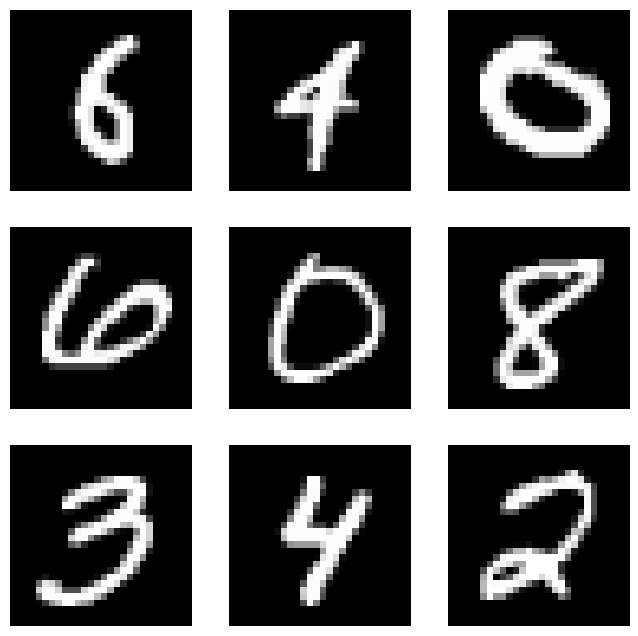

In [37]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_data), size=(1,)).item()
    img, label = mnist_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

In [41]:
from torchvision.models import resnet50, ResNet50_Weights

In [43]:
resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/dzakirm/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


KeyboardInterrupt: 

In [40]:
ResNet50_Weights.

<enum 'ResNet50_Weights'>